# COVID-19 Global Data Tracker

This notebook tracks and visualizes **COVID-19 data worldwide** using the Our World in Data compact dataset.  

We will explore global trends, top affected countries, and relationships between cases and deaths.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")


In [2]:
# Load COVID-19 dataset
url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"
covid_df = pd.read_csv(url, parse_dates=["date"])

# Select relevant columns
cols_needed = [
    "country", "date", "total_cases", "new_cases",
    "total_deaths", "new_deaths", "continent", "population"
]
covid_df = covid_df[cols_needed]

# Handle missing values
num_cols = ["total_cases", "new_cases", "total_deaths", "new_deaths", "population"]
covid_df[num_cols] = covid_df[num_cols].fillna(0)

print("✓ Dataset successfully loaded and cleaned")


✓ Dataset successfully loaded and cleaned


In [3]:
# Display first few rows
covid_df.head()
# Check missing values
covid_df.isnull().sum()
# Check dataset info
covid_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523599 entries, 0 to 523598
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   country       523599 non-null  object        
 1   date          523599 non-null  datetime64[ns]
 2   total_cases   523599 non-null  float64       
 3   new_cases     523599 non-null  float64       
 4   total_deaths  523599 non-null  float64       
 5   new_deaths    523599 non-null  float64       
 6   continent     484207 non-null  object        
 7   population    523599 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 32.0+ MB


In [4]:
# Latest date
latest_date = covid_df['date'].max()
latest_data = covid_df[covid_df['date'] == latest_date]

# Global totals
total_cases = latest_data['total_cases'].sum()
total_deaths = latest_data['total_deaths'].sum()

print(f"Total COVID-19 cases worldwide (as of {latest_date.date()}): {int(total_cases):,}")
print(f"Total COVID-19 deaths worldwide (as of {latest_date.date()}): {int(total_deaths):,}")

# Top 10 countries by total cases
top_countries = latest_data.sort_values(by="total_cases", ascending=False).head(10)
top_countries[['country', 'total_cases', 'total_deaths']]


Total COVID-19 cases worldwide (as of 2025-12-31): 0
Total COVID-19 deaths worldwide (as of 2025-12-31): 0


,country,total_cases,total_deaths
6148,Albania,0.0,0.0
8202,Algeria,0.0,0.0
12302,Andorra,0.0,0.0
18448,Antigua and Barbuda,0.0,0.0
20502,Argentina,0.0,0.0
22553,Armenia,0.0,0.0
24607,Aruba,0.0,0.0
34891,Azerbaijan,0.0,0.0
36945,Bahamas,0.0,0.0
43097,Barbados,0.0,0.0


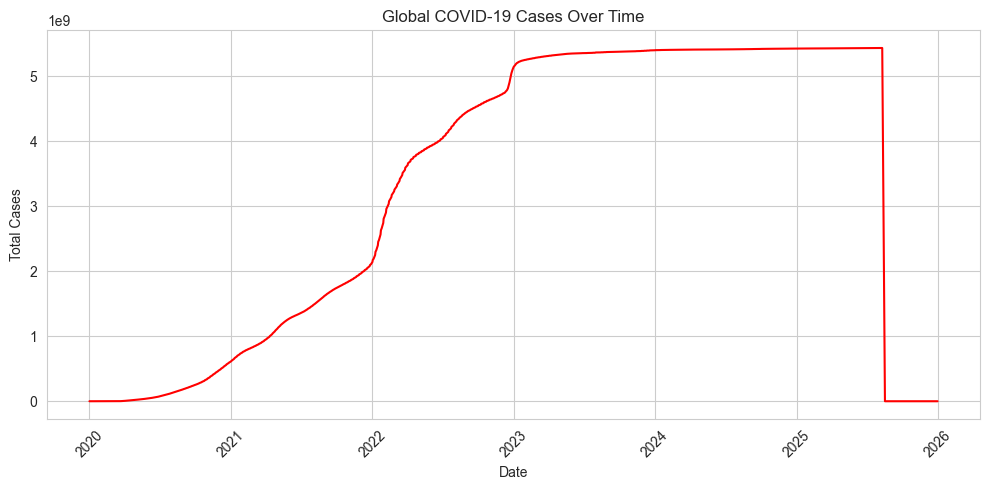

In [5]:
global_cases = covid_df.groupby('date')['total_cases'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(global_cases['date'], global_cases['total_cases'], color='red')
plt.title("Global COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


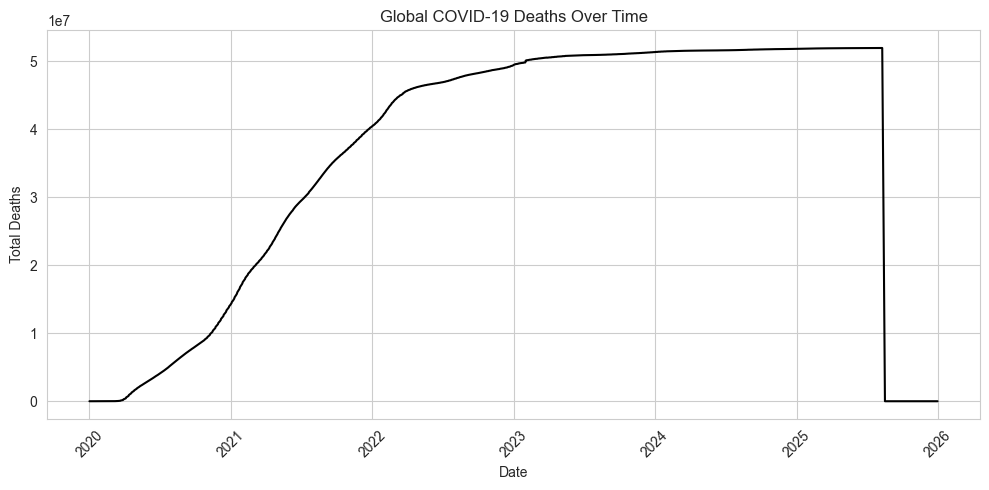

In [6]:
global_deaths = covid_df.groupby('date')['total_deaths'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(global_deaths['date'], global_deaths['total_deaths'], color='black')
plt.title("Global COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11716\1176064355.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_cases", y="country", data=top_countries, palette="Reds_r")


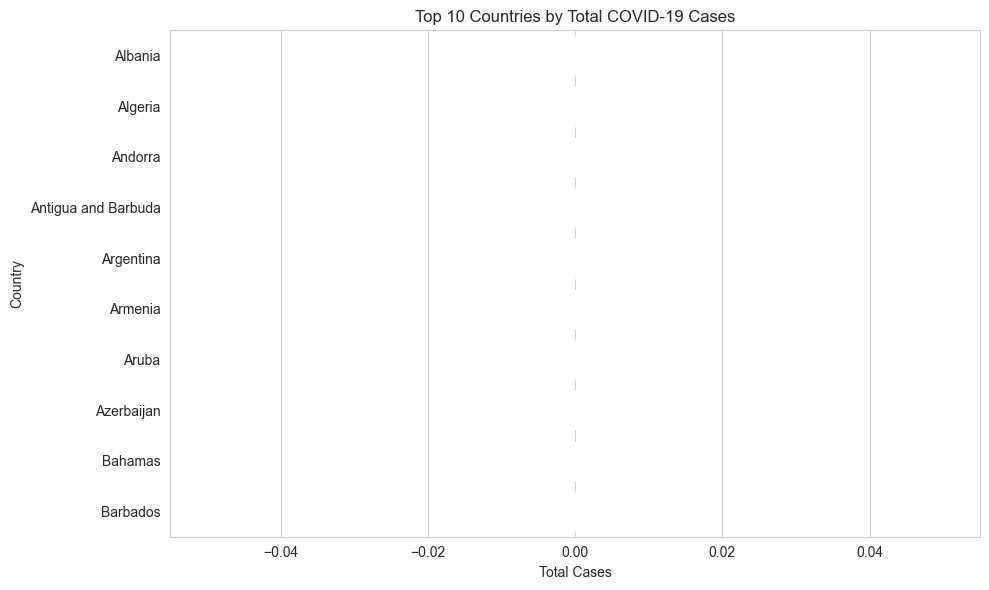

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x="total_cases", y="country", data=top_countries, palette="Reds_r")
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11716\4019167085.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale("log")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11716\4019167085.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


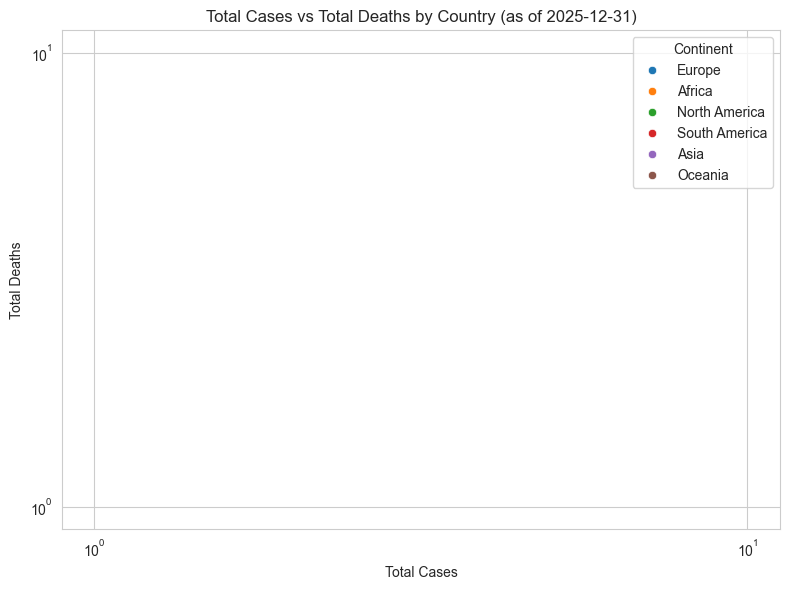

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="total_cases",
    y="total_deaths",
    data=latest_data,
    hue="continent",
    palette="tab10"
)
plt.title(f"Total Cases vs Total Deaths by Country (as of {latest_date.date()})")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.xscale("log")
plt.yscale("log")
plt.legend(title="Continent")
plt.tight_layout()
plt.show()


### Observations

- Global COVID-19 cases and deaths show distinct waves over time.
- Countries with higher total cases generally have higher total deaths.
- Visualization helps understand the pandemic evolution and impact across continents.
- This tracker can be updated automatically as new data becomes available.
